# Analytic tests for BILBY samplers

In [4]:
import bilby
import numpy as np
import matplotlib.pyplot as plt

13:44 bilby INFO    : Running bilby version: 0.4.3:


## Defining multivariate gaussian likelihood

In [5]:
class MultidimGaussianLikelihood(bilby.Likelihood):
    """
        A very simple multivariate Gaussian likelihood

        Parameters
        ----------
        data: array_like
            The data to analyse
        """
    def __init__(self, data, dim):
        self.dim = dim
        self.data = np.array(data)
        self.N = len(data)
        self.parameters = {}

            
    def log_likelihood(self):
        mu = np.array(
            [self.parameters['mu_{0}'.format(i)] for i in range(self.dim)])
        sigma = np.array(
            [self.parameters['sigma_{0}'.format(i)] for i in range(self.dim)])
        p = np.array(
            [(self.data[n,:] - mu)/sigma for n in range(self.N)])
        return np.sum(-0.5 * (np.sum(p**2) + self.N * np.log(2 * np.pi * sigma**2)))



## Sampling in $\mu$ and $\sigma$
$\mu\sim U(-5, 5)$ <br/>
$\sigma\sim U(0.2, 5)$

In [6]:
label = 'multidim_gaussian'
outdir = 'outdir'

# Making simulated data: generating n-dim Gaussian

dim = 1
mean = np.zeros(dim)
cov = np.ones((dim,dim))
data = np.random.multivariate_normal(mean, cov, 100)

**Dynesty**

21:31 bilby INFO    : Running for label 'multidim_gaussian', output will be saved to 'outdir'
21:31 bilby INFO    : Search parameters:
21:31 bilby INFO    :   mu_0 = Uniform(minimum=-5, maximum=5, name='mu', latex_label='mu', unit=None)
21:31 bilby INFO    :   sigma_0 = LogUniform(minimum=0.2, maximum=5, name='sigma', latex_label='sigma', unit=None)
21:31 bilby INFO    : Single likelihood evaluation took 3.800e-04 s
21:31 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'check_point_delta_t': 600, 'nlive': 1024, 'first_update': None, 'npdim': None, 'rstate': None, 'queue_size': None, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': None, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 2.0, 'facc': 0.5, 'slices': 5, 'walks': 10, 'update_interval': 614, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dyne

21:32 bilby INFO    : Sampling time: 0:01:04.919835
21:32 bilby INFO    : Results saved to outdir/
21:32 bilby INFO    : Summary of results:
nsamples: 10292
log_noise_evidence:    nan
log_evidence: -138.013 +/-  0.075
log_bayes_factor:    nan +/-  0.075



Analytic evidence -2.302585092994046


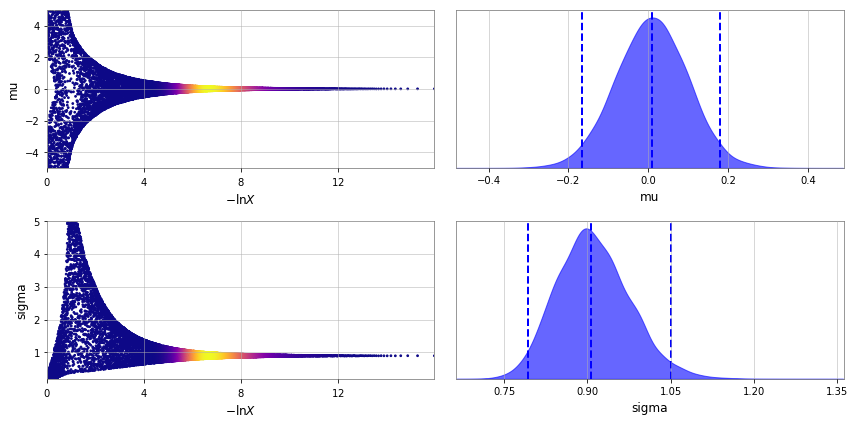

In [6]:
likelihood = MultidimGaussianLikelihood(data, dim)
priors = bilby.core.prior.PriorDict()
priors.update(
    {"mu_{0}".format(i): bilby.core.prior.Uniform(-5, 5, 'mu') for i in range(dim)} )       
priors.update(
    {"sigma_{0}".format(i): bilby.core.prior.LogUniform(0.2, 5, 'sigma')
    for i in range(dim)})

# And run sampler
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', npoints=1024,
    walks=10, outdir=outdir, label=label, plot = True)
result.plot_corner()

# Analytic evidence solution
logz_real = dim * -np.log(2 * 5)
print('Analytic evidence', logz_real)

In [1]:
t_sampling = 1.4
nsamples= 10292
t_sampling/nsamples

0.00013602798289933927

In [7]:
result.posterior.tail()

,mu_0,sigma_0,log_likelihood,log_prior
10287,0.007907,0.900482,-131.314691,-3.366792
10288,0.006149,0.898077,-131.314679,-3.364118
10289,0.004359,0.900386,-131.314640,-3.366686
10290,0.004725,0.900686,-131.314640,-3.367018
10291,0.007227,0.900330,-131.314535,-3.366623


In [11]:
! pip install --user numpy==1.16

  Using cached https://files.pythonhosted.org/packages/7b/74/54c5f9bb9bd4dae27a61ec1b39076a39d359b3fb7ba15da79ef23858a9d8/numpy-1.16.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


**cpNest**

In [8]:
dim = 1
outdir = 'outdir_cpnest'
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='cpnest', npoints=1024,
    outdir=outdir, label=label, plot = True)
result.plot_corner()

# Analytic evidence solution
logz_real = dim * -np.log(2 * 5)

13:45 bilby INFO    : Running for label 'multidim_gaussian', output will be saved to 'outdir_cpnest'
13:45 bilby INFO    : Search parameters:
13:45 bilby INFO    :   mu_0 = Uniform(minimum=-5, maximum=5, name='mu', latex_label='mu', unit=None)
13:45 bilby INFO    :   sigma_0 = LogUniform(minimum=0.2, maximum=5, name='sigma', latex_label='sigma', unit=None)
13:45 bilby INFO    : Single likelihood evaluation took 5.610e-04 s
13:45 bilby WARNING : No seed provided, cpnest will use 1234.
13:45 bilby INFO    : Using sampler Cpnest with kwargs {'verbose': 1, 'nthreads': 1, 'nlive': 1024, 'maxmcmc': 1000, 'seed': None, 'poolsize': 100, 'nhamiltonian': 0, 'resume': True, 'output': 'outdir_cpnest/cpnest_multidim_gaussian/'}


Running with 1 parallel threads



SMPLR 0 init evolve:   0%|          | 0/100 [00:00<?, ?it/s]/home/c1819547/miniconda3/envs/bilby/lib/python3.6/site-packages/bilby/core/prior.py:776: RuntimeWarning: invalid value encountered in log
  return (self.alpha * np.nan_to_num(np.log(val)) + np.log(normalising)) + np.log(1. * self.is_in_prior_range(val))
/home/c1819547/miniconda3/envs/bilby/lib/python3.6/site-packages/bilby/core/prior.py:776: RuntimeWarning: divide by zero encountered in log
  return (self.alpha * np.nan_to_num(np.log(val)) + np.log(normalising)) + np.log(1. * self.is_in_prior_range(val))
                                                                     
CPNEST: populate samplers: 100%|██████████| 1024/1024 [00:26<00:00, 39.20it/s]
1: n:  32 acc:0.406 sub_acc:0.406 H: 0.00 logL -27288.83308 --> -203.80785 dZ: 27162.602 logZ: -27295.765 logLmax: -133.16
2: n:  32 acc:0.469 sub_acc:0.469 H: 6.93 logL -23387.79374 --> -178.12552 dZ: 23261.562 logZ: -23394.727 logLmax: -133.16
3: n:  32 acc:0.281 sub_acc:0.281

Final evidence: -139.24
Information: 5.55
Computed log_evidences: (-139.2396814843077,)
Relative weights of input files: [1.0]
Relative weights of input files taking into account their length: [1.0]
Number of input samples: [10137]
Expected number of samples from each input file [2676]
Samples produced: 2676


13:48 bilby INFO    : Sampling time: 0:03:00.818122
13:48 bilby INFO    : Results saved to outdir_cpnest/
13:48 bilby INFO    : Summary of results:
nsamples: 2676
log_noise_evidence:    nan
log_evidence: -139.237 +/-    nan
log_bayes_factor:    nan +/-    nan



<Figure size 720x720 with 0 Axes>

In [9]:
result.posterior.tail()

,mu_0,sigma_0,log_likelihood,log_prior
2671,-0.040195,0.906872,-132.688923,-3.373863
2672,-0.034387,0.912625,-132.688576,-3.380187
2673,-0.037830,0.916250,-132.688479,-3.384151
2674,-0.046517,0.908981,-132.688342,-3.376186
2675,-0.040807,0.916478,-132.687989,-3.384400


## Sampling in $\mu$ - 5D Gaussian
Fixing $\sigma=0.5$

**Dynesty**

13:52 bilby INFO    : Running for label 'multidim_gaussian', output will be saved to 'outdir_5D'
13:52 bilby INFO    : Search parameters:
13:52 bilby INFO    :   mu_0 = Uniform(minimum=-5, maximum=5, name='mu', latex_label='mu', unit=None)
13:52 bilby INFO    :   mu_1 = Uniform(minimum=-5, maximum=5, name='mu', latex_label='mu', unit=None)
13:52 bilby INFO    :   mu_2 = Uniform(minimum=-5, maximum=5, name='mu', latex_label='mu', unit=None)
13:52 bilby INFO    :   mu_3 = Uniform(minimum=-5, maximum=5, name='mu', latex_label='mu', unit=None)
13:52 bilby INFO    :   mu_4 = Uniform(minimum=-5, maximum=5, name='mu', latex_label='mu', unit=None)
13:52 bilby INFO    :   sigma_0 = 0.5
13:52 bilby INFO    :   sigma_1 = 0.5
13:52 bilby INFO    :   sigma_2 = 0.5
13:52 bilby INFO    :   sigma_3 = 0.5
13:52 bilby INFO    :   sigma_4 = 0.5
13:52 bilby INFO    : Single likelihood evaluation took 7.820e-04 s
13:52 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 

13:56 bilby INFO    : Sampling time: 0:04:02.777337
13:58 bilby INFO    : Results saved to outdir_5D/
13:58 bilby INFO    : Summary of results:
nsamples: 30016
log_noise_evidence:    nan
log_evidence: -4916.623 +/-  0.154
log_bayes_factor:    nan +/-  0.154



Analytic evidence -11.51292546497023


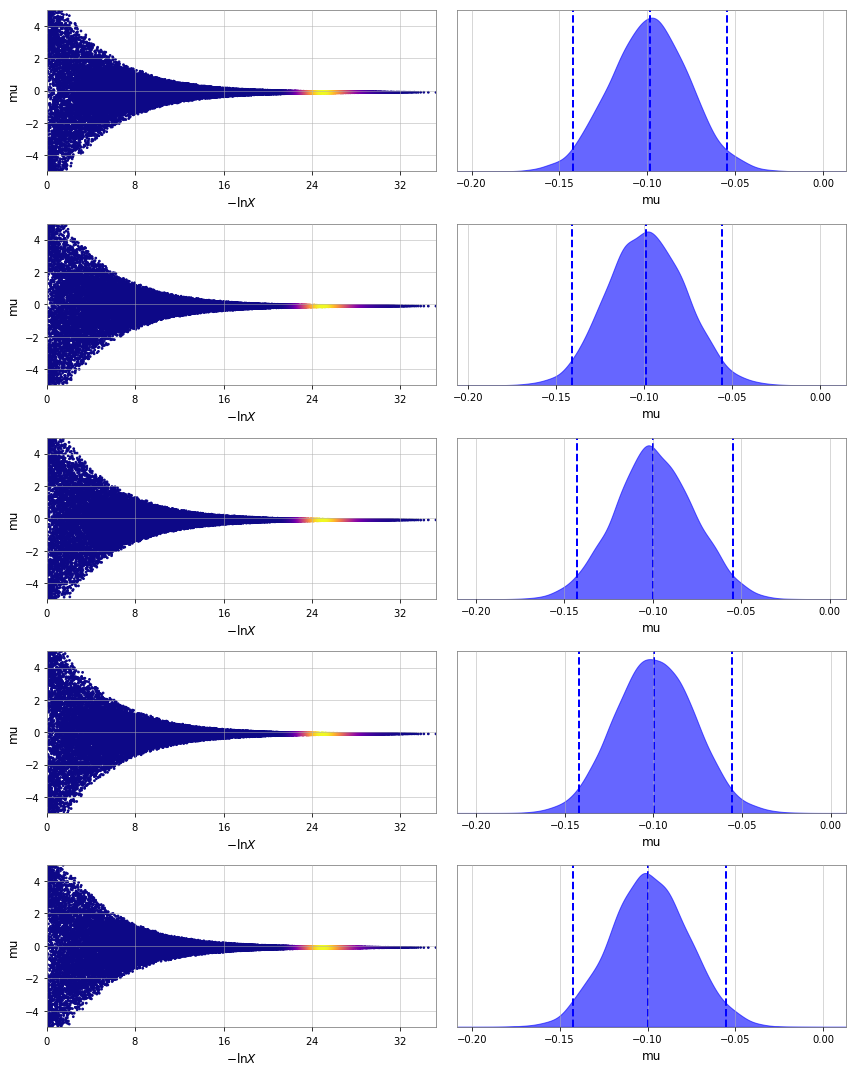

In [16]:
outdir = 'outdir_5D'

dim = 5
mean = np.zeros(dim)
cov = np.ones((dim,dim))
data = np.random.multivariate_normal(mean, cov, 100)

likelihood = MultidimGaussianLikelihood(data, dim)
priors = bilby.core.prior.PriorDict()
priors.update(
    {"mu_{0}".format(i): bilby.core.prior.Uniform(-5, 5, 'mu') for i in range(dim)} )   
priors.update(
    {"sigma_{0}".format(i): 0.5 for i in range(dim)})

# And run sampler
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', npoints=1024,
    walks=10, outdir=outdir, label=label, plot = True)
#result.plot_corner()

# Analytic evidence solution
logz_real = dim * -np.log(2 * 5)
print('Analytic evidence', logz_real)

**cpNest**

In [ ]:
outdir = 'outdir_5D_cpnest'

dim = 5
     
# And run sampler
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='cpnest', npoints=1024, outdir=outdir, label=label, plot = True)
#result.plot_corner()

# Analytic evidence solution
logz_real = dim * -np.log(2 * 5)
print('Analytic evidence', logz_real)

14:00 bilby INFO    : Running for label 'multidim_gaussian', output will be saved to 'outdir_5D_cpnest'
14:00 bilby INFO    : Search parameters:
14:00 bilby INFO    :   mu_0 = Uniform(minimum=-5, maximum=5, name='mu', latex_label='mu', unit=None)
14:00 bilby INFO    :   mu_1 = Uniform(minimum=-5, maximum=5, name='mu', latex_label='mu', unit=None)
14:00 bilby INFO    :   mu_2 = Uniform(minimum=-5, maximum=5, name='mu', latex_label='mu', unit=None)
14:00 bilby INFO    :   mu_3 = Uniform(minimum=-5, maximum=5, name='mu', latex_label='mu', unit=None)
14:00 bilby INFO    :   mu_4 = Uniform(minimum=-5, maximum=5, name='mu', latex_label='mu', unit=None)
14:00 bilby INFO    :   sigma_0 = 0.5
14:00 bilby INFO    :   sigma_1 = 0.5
14:00 bilby INFO    :   sigma_2 = 0.5
14:00 bilby INFO    :   sigma_3 = 0.5
14:00 bilby INFO    :   sigma_4 = 0.5
14:00 bilby INFO    : Single likelihood evaluation took 1.982e-03 s
14:00 bilby WARNING : No seed provided, cpnest will use 1234.
14:00 bilby INFO    : Usi

Running with 1 parallel threads



                                                                      
CPNEST: populate samplers: 100%|██████████| 1024/1024 [01:00<00:00, 17.06it/s]
1: n:  44 acc:0.250 sub_acc:0.250 H: 0.00 logL -104689.94695 --> -21534.06548 dZ: 95768.179 logZ: -104696.879 logLmax: -8928.70
2: n:  44 acc:0.159 sub_acc:0.159 H: 6.93 logL -97475.25991 --> -55025.66689 dZ: 88553.492 logZ: -97482.193 logLmax: -8928.70
3: n:  44 acc:0.159 sub_acc:0.159 H: 6.93 logL -96349.34749 --> -15033.15668 dZ: 87427.579 logZ: -96356.281 logLmax: -8928.70
4: n:  44 acc:0.227 sub_acc:0.227 H: 6.93 logL -95208.65478 --> -56158.10471 dZ: 86286.886 logZ: -95215.590 logLmax: -8928.70
5: n:  44 acc:0.159 sub_acc:0.159 H: 6.94 logL -94008.72075 --> -45585.55252 dZ: 85086.952 logZ: -94015.657 logLmax: -8928.70
6: n:  44 acc:0.182 sub_acc:0.182 H: 6.94 logL -93416.16787 --> -59652.84608 dZ: 84494.400 logZ: -93423.105 logLmax: -8928.70
7: n:  44 acc:0.250 sub_acc:0.250 H: 6.94 logL -90661.36572 --> -46291.80547 dZ: 81739.597 

In [ ]:
outdir = 'outdir_5D'

dim = 5
     
# And run sampler
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='nestle', npoints=1024, outdir=outdir, label=label, plot = True)
#result.plot_corner()

# Analytic evidence solution
logz_real = dim * -np.log(2 * 5)
print('Analytic evidence', logz_real)